In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
           'BRK.B', 'V', 'COST', 'PG', 'UEEC.A', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 
           'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
           'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2021-10-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-02', tz='America/New_York').isoformat()

In [5]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [6]:
# Review the first 5 rows of the Alpaca DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)
#for i,r in ticker_data.tail(1).iterrows():
    #print(r)
#ticker_data[ticker_data['symbol']=='BRK.B'].drop('symbol', axis=1).dropna()
#ticker_data[ticker_data['symbol']=='UEEC.A'].drop('symbol', axis=1).dropna()

In [7]:
# Set drop_columns variable
drop_columns = ['open', 'symbol', 'vwap', 'volume', 'trade_count', 'high', 'low']

In [8]:
# Reorganize the DataFrame
# Separate ticker data
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop(drop_columns, axis=1).dropna()
CAT = ticker_data[ticker_data['symbol']=='CAT'].drop(drop_columns, axis=1).dropna()
DHR = ticker_data[ticker_data['symbol']=='DHR'].drop(drop_columns, axis=1).dropna()
RTX = ticker_data[ticker_data['symbol']=='RTX'].drop(drop_columns, axis=1).dropna()
AAPL = ticker_data[ticker_data['symbol']=='AAPL'].drop(drop_columns, axis=1).dropna()
SOFI = ticker_data[ticker_data['symbol']=='SOFI'].drop(drop_columns, axis=1).dropna()
DIS = ticker_data[ticker_data['symbol']=='DIS'].drop(drop_columns, axis=1).dropna()
JPM = ticker_data[ticker_data['symbol']=='JPM'].drop(drop_columns, axis=1).dropna()
WMT = ticker_data[ticker_data['symbol']=='WMT'].drop(drop_columns, axis=1).dropna()
XOM = ticker_data[ticker_data['symbol']=='XOM'].drop(drop_columns, axis=1).dropna()
COP = ticker_data[ticker_data['symbol']=='COP'].drop(drop_columns, axis=1).dropna()
BRK = ticker_data[ticker_data['symbol']=='BRK.B'].drop(drop_columns, axis=1).dropna()
V = ticker_data[ticker_data['symbol']=='V'].drop(drop_columns, axis=1).dropna()
COST = ticker_data[ticker_data['symbol']=='COST'].drop(drop_columns, axis=1).dropna()
PG = ticker_data[ticker_data['symbol']=='PG'].drop(drop_columns, axis=1).dropna()
UEEC = ticker_data[ticker_data['symbol']=='UEEC'].drop(drop_columns, axis=1).dropna()
NVDA = ticker_data[ticker_data['symbol']=='NVDA'].drop(drop_columns, axis=1).dropna()
HD = ticker_data[ticker_data['symbol']=='HD'].drop(drop_columns, axis=1).dropna()
PTON = ticker_data[ticker_data['symbol']=='PTON'].drop(drop_columns, axis=1).dropna()
LUV = ticker_data[ticker_data['symbol']=='LUV'].drop(drop_columns, axis=1).dropna()
MU = ticker_data[ticker_data['symbol']=='MU'].drop(drop_columns, axis=1).dropna()
MSFT = ticker_data[ticker_data['symbol']=='MSFT'].drop(drop_columns, axis=1).dropna()
FB = ticker_data[ticker_data['symbol']=='FB'].drop(drop_columns, axis=1).dropna()
NFLX = ticker_data[ticker_data['symbol']=='NFLX'].drop(drop_columns, axis=1).dropna()
GSL = ticker_data[ticker_data['symbol']=='GSL'].drop(drop_columns, axis=1).dropna()
IDT = ticker_data[ticker_data['symbol']=='IDT'].drop(drop_columns, axis=1).dropna()
GBT = ticker_data[ticker_data['symbol']=='GBT'].drop(drop_columns, axis=1).dropna()
PTLO = ticker_data[ticker_data['symbol']=='PTLO'].drop(drop_columns, axis=1).dropna()
SKIN = ticker_data[ticker_data['symbol']=='SKIN'].drop(drop_columns, axis=1).dropna()
ORGN = ticker_data[ticker_data['symbol']=='ORGN'].drop(drop_columns, axis=1).dropna()
TITN = ticker_data[ticker_data['symbol']=='TITN'].drop(drop_columns, axis=1).dropna()
BXC = ticker_data[ticker_data['symbol']=='BXC'].drop(drop_columns, axis=1).dropna()

In [9]:
# Concatenate the ticker DataFrames
ticker_data = pd.concat([SPY,CAT, DHR, RTX, AAPL, SOFI, DIS, JPM, WMT, XOM, COP,
BRK, V, COST, PG, NVDA, HD, PTON, LUV, MU, MSFT, FB, NFLX, GSL, IDT, GBT, 
PTLO, SKIN, ORGN, TITN, BXC], axis=1, keys=['SPY','CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
'BRK-B', 'V', 'COST', 'PG', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC'])

In [10]:
# ticker_data.columns=['SPY','CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
# 'BRK-B', 'V', 'COST', 'PG', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
# 'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC']

In [11]:
ticker_data.dropna().copy()

SPY     CAT     DHR     RTX     AAPL     SOFI  \
                            close   close   close   close    close    close   
timestamp                                                                     
2021-10-21 04:00:00+00:00  453.59  202.14  310.74   91.61  149.480  20.9900   
2021-10-22 04:00:00+00:00  453.12  200.65  313.38   91.86  148.690  20.5800   
2021-10-25 04:00:00+00:00  455.55  202.21  306.10   91.30  148.640  20.6900   
2021-10-26 04:00:00+00:00  455.96  199.64  306.93   89.16  149.320  19.9600   
2021-10-27 04:00:00+00:00  453.94  196.13  305.24   89.16  148.850  19.2500   
2021-10-28 04:00:00+00:00  458.32  204.09  304.57   89.19  152.570  19.9100   
2021-10-29 04:00:00+00:00  459.25  204.01  311.77   88.86  149.800  20.0900   
2021-11-01 04:00:00+00:00  460.04  205.38  309.68   88.55  148.960  22.6200   
2021-11-02 04:00:00+00:00  461.90  207.12  313.25   87.80  150.020  22.6800   
2021-11-03 04:00:00+00:00  464.72  203.55  310.85   88.67  151.490  22.9600   
2021-11-04 04:00:00+00:00  466.91  203.59  305.99   88.06  150.960  23.2900   
2021-11-05 04:00:00+00:00  468.53  205.88  292.08   91.18  151.280  22.5700   
2021-11-08 05:00:00+00:00  468.93  214.25  301.35   90.71  150.440  22.7400   
2021-11-09 05:00:00+00:00  467.38  209.81  299.19   90.99  150.810  22.1400   
2021-11-10 05:00:00+00:00  463.62  206.67  302.03   90.18  147.920  20.4200   
2021-11-11 05:00:00+00:00  463.77  208.53  304.54   89.05  147.870  22.9700   
2021-11-12 05:00:00+00:00  467.27  209.27  304.38   88.86  149.990  22.7600   
2021-11-15 05:00:00+00:00  467.43  207.71  299.68   89.35  150.000  22.9200   
2021-11-16 05:00:00+00:00  469.28  205.43  305.59   88.90  151.000  21.6700   
2021-11-17 05:00:00+00:00  468.14  202.98  309.67   87.45  153.490  21.1200   
2021-11-18 05:00:00+00:00  469.73  201.42  312.65   86.91  157.870  20.5700   
2021-11-19 05:00:00+00:00  468.89  200.44  314.13   85.43  160.550  20.3700   
2021-11-22 05:00:00+00:00  467.57  202.38  313.73   86.80  161.020  18.7500   
2021-11-23 05:00:00+00:00  468.19  205.33  313.52   87.31  161.410  17.8100   
2021-11-24 05:00:00+00:00  469.44  207.07  315.48   87.19  161.940  18.3300   
2021-11-26 05:00:00+00:00  458.97  198.73  323.96   83.00  156.810  18.2100   
2021-11-29 05:00:00+00:00  464.60  195.92  326.52   82.94  160.240  18.4300   
2021-11-30 05:00:00+00:00  455.56  193.35  321.64   80.92  165.300  17.2000   
2021-12-01 05:00:00+00:00  450.50  191.47  319.72   79.05  164.770  16.3900   
2021-12-02 05:00:00+00:00  457.40  196.79  316.06   81.66  163.760  16.4300   
2021-12-03 05:00:00+00:00  453.42  197.80  312.94   81.11  161.840  15.1900   
2021-12-06 05:00:00+00:00  458.79  201.28  306.90   83.76  165.320  15.7200   
2021-12-07 05:00:00+00:00  468.28  204.49  313.35   85.01  171.180  16.6200   
2021-12-08 05:00:00+00:00  469.52  204.19  318.26   86.50  175.080  16.9400   
2021-12-09 05:00:00+00:00  466.35  204.13  319.28   86.16  174.560  15.6600   
2021-12-10 05:00:00+00:00  470.74  203.46  317.49   86.16  179.450  15.0100   
2021-12-13 05:00:00+00:00  466.57  201.25  318.51   84.33  175.740  14.5800   
2021-12-14 05:00:00+00:00  463.36  201.64  307.70   83.50  174.330  14.4800   
2021-12-15 05:00:00+00:00  470.60  202.55  314.98   83.43  179.300  15.1600   
2021-12-16 05:00:00+00:00  466.45  206.17  318.49   82.70  172.260  14.2700   
2021-12-17 05:00:00+00:00  459.87  201.37  313.41   82.28  171.140  14.6500   
2021-12-20 05:00:00+00:00  454.98  195.46  314.29   81.03  169.750  14.5900   
2021-12-21 05:00:00+00:00  463.06  198.31  313.92   83.68  172.990  14.9700   
2021-12-22 05:00:00+00:00  467.69  202.15  319.68   84.07  175.640  14.9900   
2021-12-23 05:00:00+00:00  470.60  206.20  320.79   84.90  176.280  15.0900   
2021-12-27 05:00:00+00:00  477.26  206.38  327.41   85.24  180.330  15.3900   
2021-12-28 05:00:00+00:00  476.87  206.62  323.44   86.02  179.290  14.8500   
2021-12-29 05:00:00+00:00  477.48  207.33  326.58   85.89  179.380  14.4700   
2

In [12]:
ticker_data.shape

(133, 31)

In [13]:
# Prepare the data for analysis by converting values to daily returns
daily_returns = ticker_data.pct_change().dropna()

In [14]:
# Preview the data
daily_returns.head()

SPY       CAT       DHR       RTX      AAPL  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00 -0.001036 -0.007371  0.008496  0.002729 -0.005285   
2021-10-25 04:00:00+00:00  0.005363  0.007775 -0.023231 -0.006096 -0.000336   
2021-10-26 04:00:00+00:00  0.000900 -0.012710  0.002712 -0.023439  0.004575   
2021-10-27 04:00:00+00:00 -0.004430 -0.017582 -0.005506  0.000000 -0.003148   
2021-10-28 04:00:00+00:00  0.009649  0.040585 -0.002195  0.000336  0.024992   

                               SOFI       DIS       JPM       WMT       XOM  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00 -0.019533 -0.011206  0.013451  0.010422  0.006859   
2021-10-25 04:00:00+00:00  0.005345  0.015287 -0.004890  0.011595  0.019487   
2021-10-26 04:00:00+00:00 -0.035283  0.000174  0.002691 -0.008730  0.023155   
2021-10-27 04:00:00+00:00 -0.035571 -0.014473 -0.020828 -0.008202 -0.025972   
2021-10-28 04:00:00+00:00  0.034286  0.000767  0.015075  0.006236  0.002807   

                                COP     BRK-B         V      COST        PG  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00  0.015149  0.008437  0.004300  0.009974  0.010766   
2021-10-25 04:00:00+00:00  0.010565  0.003526  0.011460  0.016826  0.000142   
2021-10-26 04:00:00+00:00  0.006665  0.002033 -0.008808 -0.009325  0.014200   
2021-10-27 04:00:00+00:00 -0.033753 -0.010555 -0.069192  0.007373 -0.007140   
2021-10-28 04:00:00+00:00  0.009674  0.006741 -0.027528  0.002903  0.005993   

                               NVDA        HD      PTON       LUV        MU  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00  0.001498  0.003757 -0.010545 -0.021167 -0.016463   
2021-10-25 04:00:00+00:00  0.019361  0.014399  0.029521 -0.003149  0.018516   
2021-10-26 04:00:00+00:00  0.066952 -0.005549 -0.032505  0.002317  0.002618   
2021-10-27 04:00:00+00:00 -0.010762  0.008451 -0.053606 -0.021433 -0.010154   
2021-10-28 04:00:00+00:00  0.020040 -0.002014  0.021029  0.014387  0.019637   

                               MSFT        FB      NFLX       GSL       IDT  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00 -0.005149 -0.050515  0.017790  0.002998 -0.015817   
2021-10-25 04:00:00+00:00 -0.003332  0.012569  0.010349  0.017506 -0.006978   
2021-10-26 04:00:00+00:00  0.006426 -0.039186 -0.004675 -0.028535 -0.006601   
2021-10-27 04:00:00+00:00  0.042114 -0.011368 -0.008377 -0.045356 -0.003001   
2021-10-28 04:00:00+00:00  0.003651  0.015053  0.016789  0.048869  0.011395   

                                GBT      PTLO      SKIN      ORGN      TITN  \
                              close     close     close     close     close   
timestamp                                                                     
2021-10-22 04:00:00+00:00  0.006696  0.286254 -0.006248 -0.032895 -0.012517   
2021-10-25 04:00:00+00:00 -0.022490  0.122362  0.018861  0.018707  0.020070   
2021-10-26 04:00:00+00:00 -0.027868 -0.000476 -0.010526 -0.028381 -0.039006   
2021-10-27 04:00:00+00:00  0.092667 -0.040010 -0.049523 -0.010309 -0.018678   
2021-10-28 04:00:00+00:00  0.108298 -0.074423  0.040911  0.060764  0.025256   

                                BXC  
                              close  
timestamp                            
2021-10-22 04:00:00+00:00 -0.009829  
2021-10-25 04:00:00+00:00  0.049635  
2021-10-26 04:00:00+00:00 -0.051920  
2021-1

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='timestamp'>

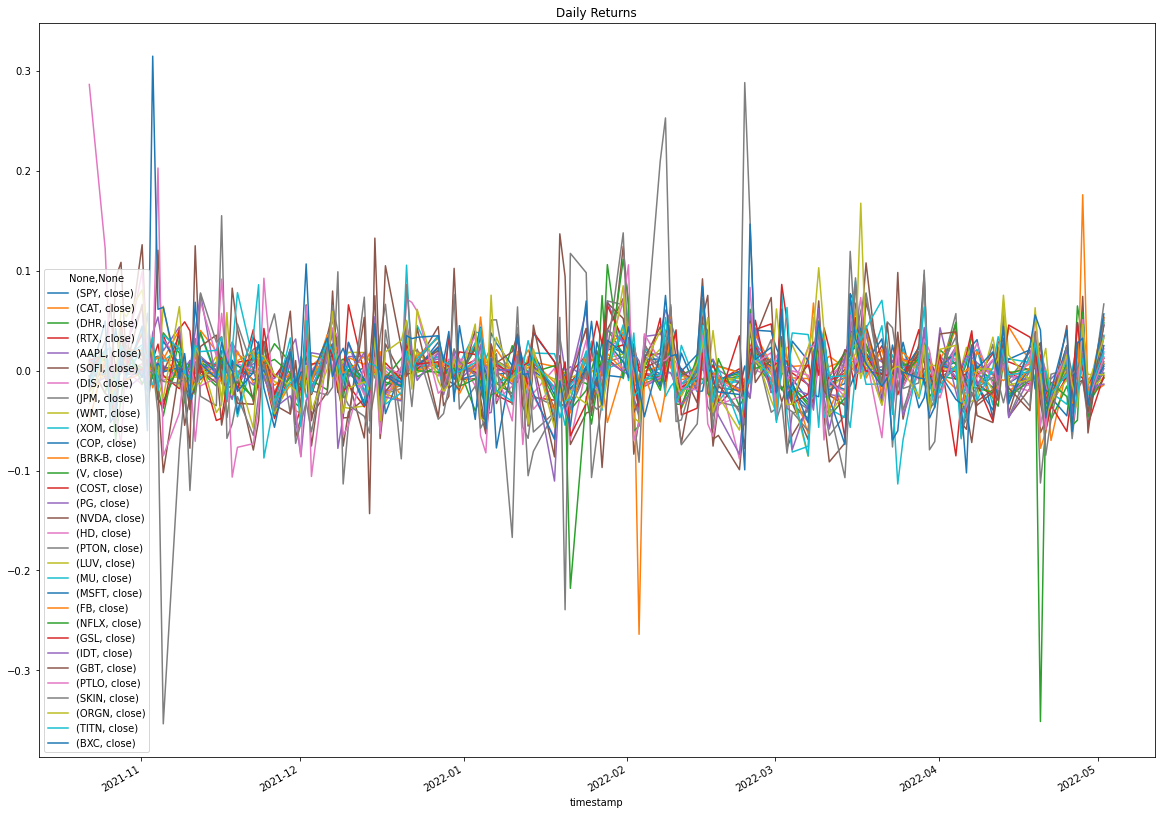

In [15]:
# Plot the daily returns of each stock vs the market proxy
daily_returns.plot(figsize=(20,15), title='Daily Returns')

In [16]:
# calculate the cumulative returns of each variable
cumulative_returns = (1 + daily_returns).cumprod()

In [17]:
# review tail of cumulative returns df
cumulative_returns.tail()

SPY       CAT       DHR       RTX      AAPL  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-26 04:00:00+00:00  0.917348  1.040368  0.807685  1.082742  1.048970   
2022-04-27 04:00:00+00:00  0.919773  1.058474  0.811868  1.078922  1.047431   
2022-04-28 04:00:00+00:00  0.943165  1.050955  0.827058  1.070625  1.094728   
2022-04-29 04:00:00+00:00  0.908309  1.041555  0.808168  1.036022  1.054656   
2022-05-02 04:00:00+00:00  0.913777  1.049124  0.806205  1.028490  1.056730   

                               SOFI       DIS       JPM       WMT       XOM  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-26 04:00:00+00:00  0.299667  0.675674  0.725782  1.057830  1.312650   
2022-04-27 04:00:00+00:00  0.292997  0.672406  0.716342  1.050610  1.350136   
2022-04-28 04:00:00+00:00  0.307289  0.672873  0.727670  1.064028  1.390971   
2022-04-29 04:00:00+00:00  0.291567  0.651512  0.704189  1.042095  1.359866   
2022-05-02 04:00:00+00:00  0.301572  0.662426  0.710619  1.035216  1.378370   

                                COP     BRK-B         V      COST        PG  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-26 04:00:00+00:00  1.224293  1.152814  0.873436  1.160363  1.146846   
2022-04-27 04:00:00+00:00  1.247620  1.149083  0.929943  1.161033  1.143759   
2022-04-28 04:00:00+00:00  1.307816  1.154975  0.958391  1.177629  1.172827   
2022-04-29 04:00:00+00:00  1.280601  1.125549  0.925686  1.114180  1.152300   
2022-05-02 04:00:00+00:00  1.285963  1.109372  0.918737  1.108375  1.136726   

                               NVDA        HD      PTON       LUV        MU  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-26 04:00:00+00:00  0.827957  0.822665  0.200569  0.925195  0.977273   
2022-04-27 04:00:00+00:00  0.811519  0.827163  0.196562  0.944102  0.968386   
2022-04-28 04:00:00+00:00  0.871761  0.855027  0.194770  0.963831  1.022436   
2022-04-29 04:00:00+00:00  0.817337  0.823871  0.185173  0.960132  0.993444   
2022-05-02 04:00:00+00:00  0.860788  0.841890  0.197511  0.956227  1.028555   

                               MSFT        FB      NFLX       GSL       IDT  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-26 04:00:00+00:00  0.869546  0.529279  0.303754  0.920343  0.571696   
2022-04-27 04:00:00+00:00  0.911379  0.511729  0.288658  0.964454  0.565036   
2022-04-28 04:00:00+00:00  0.932005  0.601761  0.305469  0.965739  0.575442   
2022-04-29 04:00:00+00:00  0.893036  0.586375  0.291445  0.952463  0.551093   
2022-05-02 04:00:00+00:00  0.915401  0.617556  0.305377  0.964026  0.576275   

                                GBT      PTLO      SKIN      ORGN      TITN  \
                              close     close     close     close     close   
timestamp                                                                     
2022-04-26 04:00:00+00:00  1.044324  0.721993  0.489526  1.074013  0.850834   
2022-04-27 04:00:00+00:00  1.031250  0.702405  0.490628  1.034539  0.830668   
2022-04-28 04:00:00+00:00  1.021365  0.738144  0.499081  1.082237  0.840403   
2022-04-29 04:00:00+00:00  0.978954  0.715808  0.481441  1.067434  0.819889   
2022-05-02 04:00:00+00:00  1.023278  0.725086  0.505696  1.101974  0.835188   

                                BXC  
                              close  
timestamp                            
2022-04-26 04:00:00+00:00  1.306118  
2022-04-27 04:00:00+00:00  1.341825  
2022-04-28 04:00:00+00:00  1.385356  
2022-0

In [18]:
# calculate the mean cumulative returns and sort the values
cumulative_returns.mean().sort_values()

PTON   close    0.388130
SOFI   close    0.637280
SKIN   close    0.721267
NFLX   close    0.735304
FB     close    0.800803
DIS    close    0.855016
IDT    close    0.862649
JPM    close    0.887318
LUV    close    0.919407
V      close    0.929671
DHR    close    0.942101
HD     close    0.979666
WMT    close    0.983398
SPY    close    0.994621
GBT    close    0.995908
MSFT   close    0.999388
RTX    close    1.010171
ORGN   close    1.029680
CAT    close    1.032999
TITN   close    1.053046
GSL    close    1.057389
PTLO   close    1.064274
BRK-B  close    1.091815
AAPL   close    1.108671
PG     close    1.110517
COST   close    1.120984
COP    close    1.150893
NVDA   close    1.153753
XOM    close    1.170238
MU     close    1.187008
BXC    close    1.527808
dtype: float64

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='timestamp'>

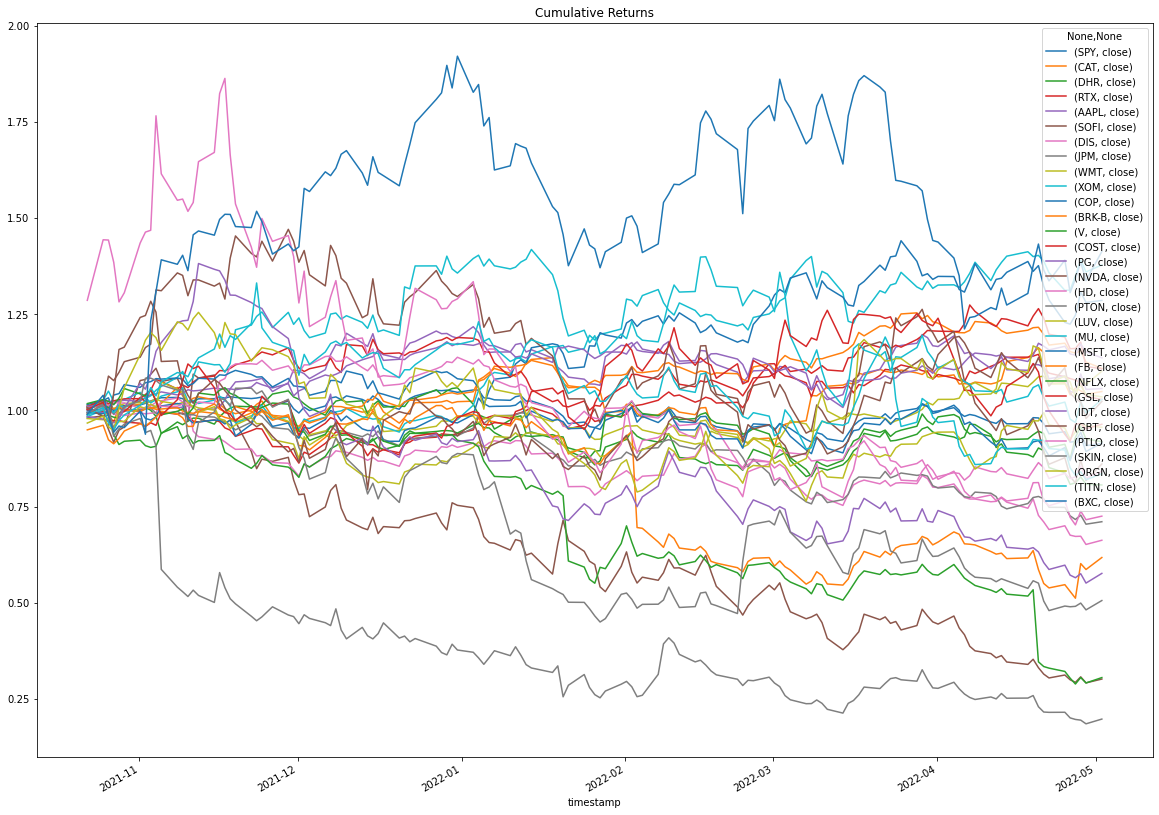

In [19]:
# Visulalize the cumulative returns
cumulative_returns.plot(figsize=(20,15), title='Cumulative Returns')

<AxesSubplot:title={'center':'Volatility'}>

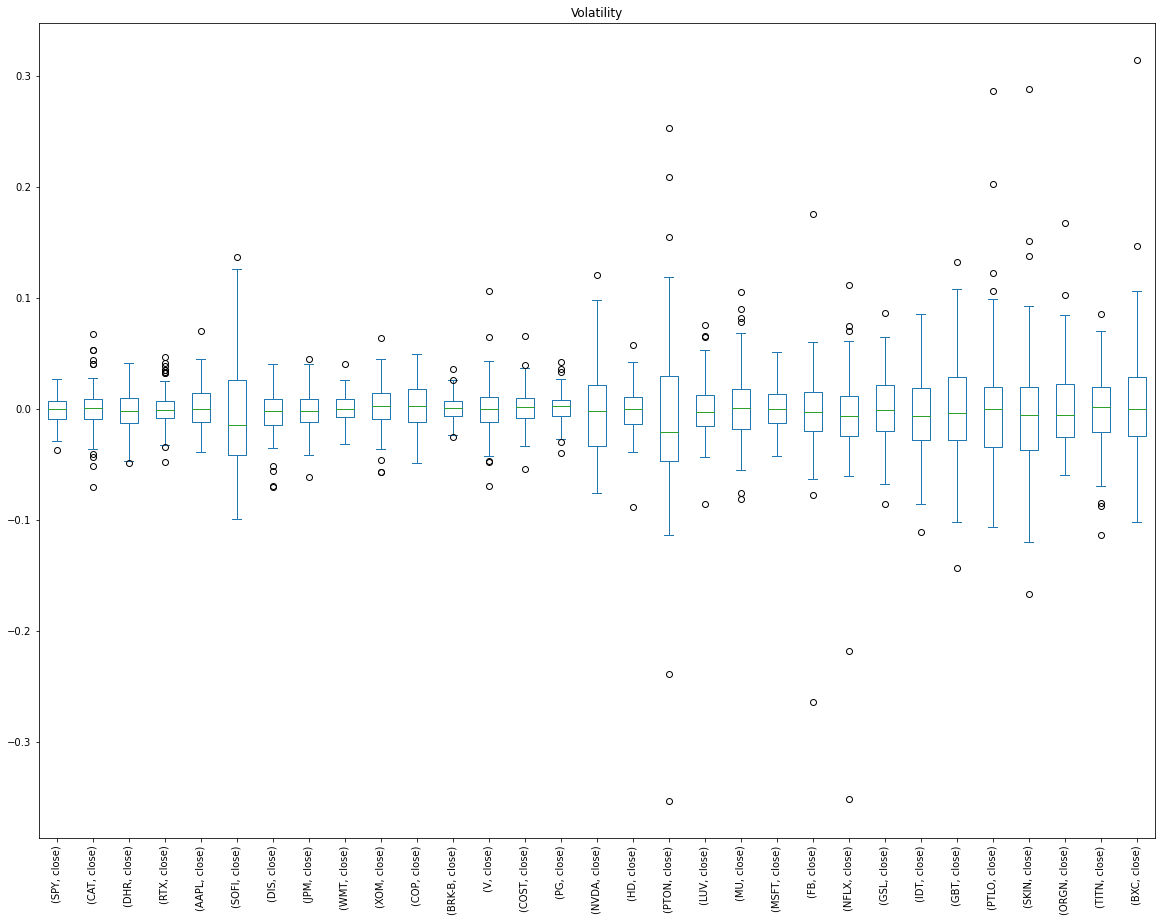

In [20]:
# use daily returns df to visualize volatility
daily_returns.plot(kind='box', figsize=(20,15), title='Volatility', rot=90)

In [21]:
# Calculate and sort the annualized standard deviation 
# Review the standard deviations sorted smallest to largest
volatility = daily_returns.std() * np.sqrt(133)
volatility.sort_values()

BRK-B  close    0.129942
WMT    close    0.138829
PG     close    0.141038
SPY    close    0.143239
RTX    close    0.176491
COST   close    0.189594
JPM    close    0.198777
HD     close    0.212257
CAT    close    0.212793
AAPL   close    0.213090
DHR    close    0.213266
DIS    close    0.220150
MSFT   close    0.226313
XOM    close    0.228102
V      close    0.253082
COP    close    0.254927
LUV    close    0.275326
MU     close    0.356557
GSL    close    0.362036
TITN   close    0.367522
IDT    close    0.405849
FB     close    0.435428
ORGN   close    0.437604
NVDA   close    0.470492
GBT    close    0.473476
NFLX   close    0.521064
BXC    close    0.563436
SOFI   close    0.580225
SKIN   close    0.612182
PTLO   close    0.631548
PTON   close    0.804055
dtype: float64

In [22]:
correlation = daily_returns.corr()
# correlation = correlation.reset_index()
# correlation = correlation.drop(columns=['level_1'])
# correlation = correlation.set_index('level_0')
correlation['CAT'].max()

close    1.0
dtype: float64

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

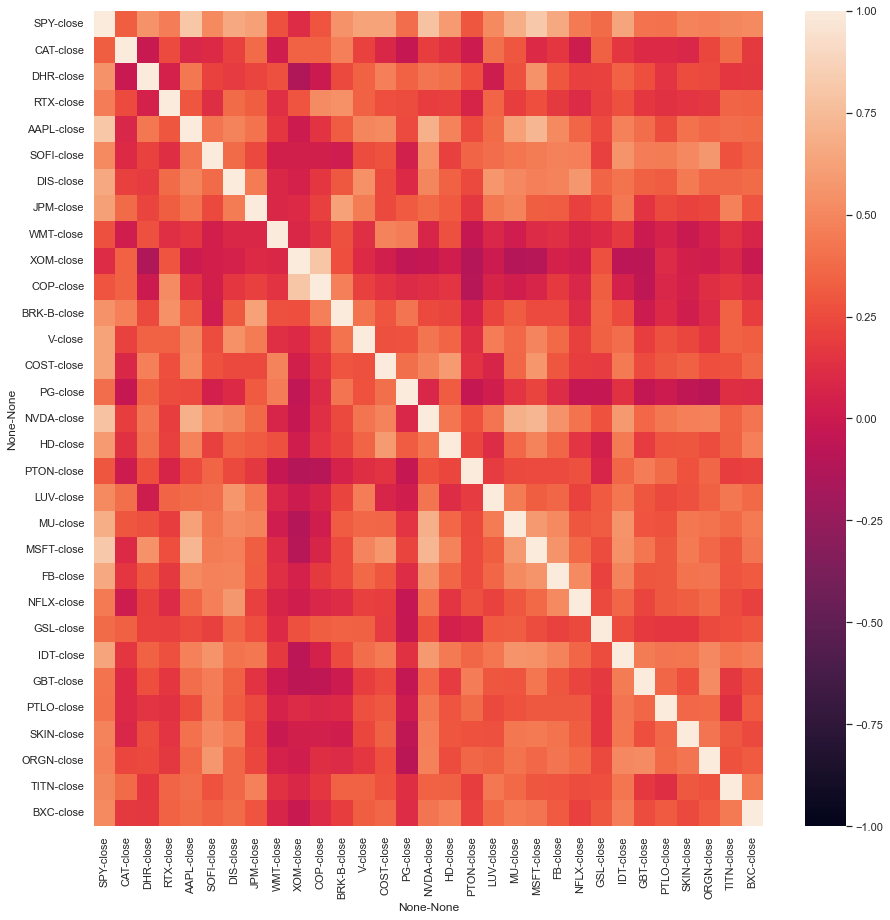

In [23]:
# calculate the correlation between returns and plot heatmap
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlation, vmin=-1, vmax=1)

In [24]:
# sum total correlation for each stock
correlation.mean(axis=1).sort_values()

XOM    close    0.102675
WMT    close    0.159209
PG     close    0.170301
COP    close    0.192770
CAT    close    0.213295
PTON   close    0.215653
GSL    close    0.257150
GBT    close    0.265157
DHR    close    0.270025
NFLX   close    0.273746
RTX    close    0.274787
PTLO   close    0.276245
SKIN   close    0.296322
BRK-B  close    0.296801
LUV    close    0.312689
TITN   close    0.317400
BXC    close    0.317699
ORGN   close    0.318320
HD     close    0.322923
SOFI   close    0.333201
COST   close    0.335708
JPM    close    0.340012
V      close    0.344251
FB     close    0.362920
DIS    close    0.379829
MU     close    0.381714
IDT    close    0.398134
MSFT   close    0.406541
AAPL   close    0.410552
NVDA   close    0.417339
SPY    close    0.526803
dtype: float64

In [25]:
# calculate annualized sharpe ratios
sharpe_ratios = (daily_returns.mean() * 252) / volatility
sharpe_ratios.sort_values()

NFLX   close   -3.755530
SOFI   close   -3.386699
DIS    close   -3.356794
JPM    close   -3.088713
PTON   close   -3.035708
IDT    close   -2.203603
DHR    close   -1.725476
FB     close   -1.673374
SKIN   close   -1.562942
HD     close   -1.345345
SPY    close   -1.066359
TITN   close   -0.585551
MSFT   close   -0.532582
V      close   -0.403149
PTLO   close   -0.402410
NVDA   close   -0.170526
LUV    close   -0.052207
GSL    close    0.147912
RTX    close    0.469261
MU     close    0.483199
GBT    close    0.536865
WMT    close    0.606359
CAT    close    0.630357
AAPL   close    0.693849
ORGN   close    0.825398
COST   close    1.214536
BRK-B  close    1.647425
BXC    close    1.674225
PG     close    1.867981
COP    close    2.124996
XOM    close    2.903779
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

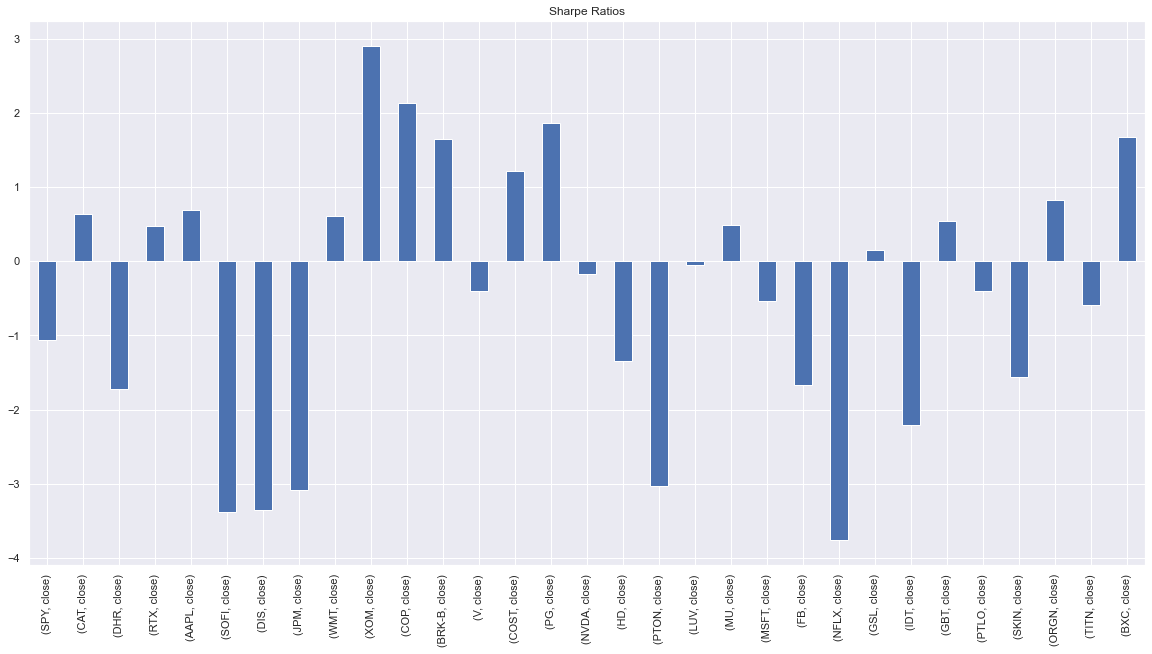

In [26]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios')

In [27]:
# pos_sharpes = []
# for ratios in sharpe_ratios:
#     if ratio > 0:
#         pos_sharpes.append(ratios)
# pos_sharpes

In [28]:
# calculate daily returns of market
snp_returns = SPY.pct_change().dropna()
snp_returns

close
timestamp                          
2021-10-22 04:00:00+00:00 -0.001036
2021-10-25 04:00:00+00:00  0.005363
2021-10-26 04:00:00+00:00  0.000900
2021-10-27 04:00:00+00:00 -0.004430
2021-10-28 04:00:00+00:00  0.009649
2021-10-29 04:00:00+00:00  0.002029
2021-11-01 04:00:00+00:00  0.001720
2021-11-02 04:00:00+00:00  0.004043
2021-11-03 04:00:00+00:00  0.006105
2021-11-04 04:00:00+00:00  0.004713
2021-11-05 04:00:00+00:00  0.003470
2021-11-08 05:00:00+00:00  0.000854
2021-11-09 05:00:00+00:00 -0.003305
2021-11-10 05:00:00+00:00 -0.008045
2021-11-11 05:00:00+00:00  0.000324
2021-11-12 05:00:00+00:00  0.007547
2021-11-15 05:00:00+00:00  0.000342
2021-11-16 05:00:00+00:00  0.003958
2021-11-17 05:00:00+00:00 -0.002429
2021-11-18 05:00:00+00:00  0.003396
2021-11-19 05:00:00+00:00 -0.001788
2021-11-22 05:00:00+00:00 -0.002815
2021-11-23 05:00:00+00:00  0.001326
2021-11-24 05:00:00+00:00  0.002670
2021-11-26 05:00:00+00:00 -0.022303
2021-11-29 05:00:00+00:00  0.012267
2021-11-30 05:00:00+00:00 -0.019458
2021-12-01 05:00:00+00:00 -0.011107
2021-12-02 05:00:00+00:00  0.015316
2021-12-03 05:00:00+00:00 -0.008701
2021-12-06 05:00:00+00:00  0.011843
2021-12-07 05:00:00+00:00  0.020685
2021-12-08 05:00:00+00:00  0.002648
2021-12-09 05:00:00+00:00 -0.006752
2021-12-10 05:00:00+00:00  0.009414
2021-12-13 05:00:00+00:00 -0.008858
2021-12-14 05:00:00+00:00 -0.006880
2021-12-15 05:00:00+00:00  0.015625
2021-12-16 05:00:00+00:00 -0.008819
2021-12-17 05:00:00+00:00 -0.014107
2021-12-20 05:00:00+00:00 -0.010633
2021-12-21 05:00:00+00:00  0.017759
2021-12-22 05:00:00+00:00  0.009999
2021-12-23 05:00:00+00:00  0.006222
2021-12-27 05:00:00+00:00  0.014152
2021-12-28 05:00:00+00:00 -0.000817
2021-12-29 05:00:00+00:00  0.001279
2021-12-30 05:00:00+00:00 -0.002765
2021-12-31 05:00:00+00:00 -0.002520
2022-01-03 05:00:00+00:00  0.005790
2022-01-04 05:00:00+00:00 -0.000335
2022-01-05 05:00:00+00:00 -0.019202
2022-01-06 05:00:00+00:00 -0.000939
2022-01-07 05:00:00+00:00 -0.003953
2022-01-10 05:00:00+00:00 -0.001244
2022-01-11 05:00:00+00:00  0.009108
2022-01-12 05:00:00+00:00  0.002704
2022-01-13 05:00:00+00:00 -0.013779
2022-01-14 05:00:00+00:00  0.000409
2022-01-18 05:00:00+00:00 -0.017710
2022-01-19 05:00:00+00:00 -0.010384
2022-01-20 05:00:00+00:00 -0.011068
2022-01-21 05:00:00+00:00 -0.019631
2022-01-24 05:00:00+00:00  0.004247
2022-01-25 05:00:00+00:00 -0.012209
2022-01-26 05:00:00+00:00 -0.002509
2022-01-27 05:00:00+00:00 -0.004938
2022-01-28 05:00:00+00:00  0.024835
2022-01-31 05:00:00+00:00  0.018011
2022-02-01 05:00:00+00:00  0.006757
2022-02-02 05:00:00+00:00  0.009714
2022-02-03 05:00:00+00:00 -0.023505
2022-02-04 05:00:00+00:00  0.004702
2022-02-07 05:00:00+00:00 -0.003209
2022-02-08 05:00:00+00:00  0.008228
2022-02-09 05:00:00+00:00  0.014636
2022-02-10 05:00:00+00:00 -0.017966
2022-02-11 05:00:00+00:00 -0.019719
2022-02-14 05:00:00+00:00 -0.003269
2022-02-15 05:00:00+00:00  0.016127
2022-02-16 05:00:00+00:00  0.001121
2022-02-17 05:00:00+00:00 -0.021317
2022-02-18 05:00:00+00:00 -0.006338
2022-02-22 05:00:00+00:00 -0.010914
2022-02-23 05:00:00+00:00 -0.017459
2022-02-24 05:00:00+00:00  0.014761
2022-02-25 05:00:00+00:00  0.022064
2022-02-28 05:00:00+00:00 -0.002559
2022-03-01 05:00:00+00:00 -0.015230
2022-03-02 05:00:00+00:00  0.018396
2022-03-03 05:00:00+00:00 -0.004841
2022-03-04 05:00:00+00:00 -0.008422
2022-03-07 05:00:00+00:00 -0.029322
2022-03-08 05:00:00+00:00 -0.007582
2022-03-09 05:00:00+00:00  0.026619
2022-03-10 05:00:00+00:00 -0.004329
2022-03-11 05:00:00+00:00 -0.012715
2022-03-14 04:00:00+00:00 -0.007308
2022-03-15 04:00:00+00:00  0.021990
2022-03-16 04:00:00+00:00  0.022010
2022-03-17 04:00:00+00:00  0.012674
2022-03-18 04:00:00+00:00  0.007346
2022-03-21 04:00:00+00:00 -0.000023
2022-03-22 04:00:00+00:00  0.011906
2022-03-23 04:00:00+00:00 -0.012878
2022-03-24 04:00:00+00:00  0.015052
2022-03-25 04:00:00+00:00  0.004906
2022-03-28 04:00:00+00:00  0.006958
2022-03-29 04:00:00+00:00  0.012482
2022-03-30 04:00:00+00:00 -0.00593

In [29]:
#calculate market variance 
market_variance = snp_returns.var()
market_variance

close    0.000154
dtype: float64

In [30]:
# for stock in daily_returns:
#     beta = stock['close'].cov(snp_returns['close'])
#     return beta

In [31]:
# calculate CAT covariance 
# CAT_cov = daily_returns['CAT']['close'].cov(snp_returns['close'])
# CAT_cov

In [32]:
# cat_beta = CAT_cov / market_variance
# cat_beta

In [33]:
daily_return = daily_returns.drop(columns=['NFLX', 'SOFI', 'DIS', 'JPM', 'PTON', 'IDT', 'DHR', 
                                                 'FB', 'SKIN', 'HD', 'TITN', 'MSFT', 'V', 'PTLO',
                                                 'NVDA', 'LUV'])
ticker_data = ticker_data.drop(columns=['SPY','NFLX', 'SOFI', 'DIS', 'JPM', 'PTON', 'IDT', 'DHR', 
                                                 'FB', 'SKIN', 'HD', 'TITN', 'MSFT', 'V', 'PTLO',
                                                 'NVDA', 'LUV'])

In [34]:
ticker_data.head()

CAT    RTX    AAPL     WMT    XOM    COP  \
                            close  close   close   close  close  close   
timestamp                                                                
2021-10-21 04:00:00+00:00  202.14  91.61  149.48  146.81  62.69  74.59   
2021-10-22 04:00:00+00:00  200.65  91.86  148.69  148.34  63.12  75.72   
2021-10-25 04:00:00+00:00  202.21  91.30  148.64  150.06  64.35  76.52   
2021-10-26 04:00:00+00:00  199.64  89.16  149.32  148.75  65.84  77.03   
2021-10-27 04:00:00+00:00  196.13  89.16  148.85  147.53  64.13  74.43   

                            BRK-B    COST      PG     MU    GSL    GBT  ORGN  \
                            close   close   close  close  close  close close   
timestamp                                                                      
2021-10-21 04:00:00+00:00  286.82  477.23  139.33  68.64  23.35  31.36  6.08   
2021-10-22 04:00:00+00:00  289.24  481.99  140.83  67.51  23.42  31.57  5.88   
2021-10-25 04:00:00+00:00  290.26  490.10  140.85  68.76  23.83  30.86  5.99   
2021-10-26 04:00:00+00:00  290.85  485.53  142.85  68.94  23.15  30.00  5.82   
2021-10-27 04:00:00+00:00  287.78  489.11  141.83  68.24  22.10  32.78  5.76   

                             BXC  
                           close  
timestamp                         
2021-10-21 04:00:00+00:00  49.85  
2021-10-22 04:00:00+00:00  49.36  
2021-10-25 04:00:00+00:00  51.81  
2021-10-26 04:00:00+00:00  49.12  
2021-10-27 04:00:00+00:00  47.03

In [37]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
one_year_simulation = MCSimulation(
    portfolio_data=ticker_data,
    weights=[0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714, 0.714,
            0.714, 0.714, 0.714],
    num_simulation=num_sims,
    num_trading_days=252*1
)

In [38]:
# Run Monte Carlo simulations to forecast three years daily returns
one_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/matthewfield/Desktop/FinTech-Workspace/Diversifying_Stock_Portfolio/My_Portfolio/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

0          1          2          3          4         5    \
0    1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1    0.920440   0.920141   0.959441   0.950570   0.994195  1.070506   
2    0.951667   0.895502   1.065549   1.026898   1.161199  1.124692   
3    1.034483   1.006224   1.001949   1.144905   1.122460  0.970170   
4    0.990333   1.015977   1.079657   1.328735   1.162054  0.986557   
5    0.964309   0.941423   1.154997   1.272501   1.127965  0.952872   
6    0.932642   0.952234   1.086803   1.216837   1.220145  0.978158   
7    0.932666   0.957579   1.080980   1.342560   1.317474  0.880079   
8    1.004829   1.020540   1.077091   1.335198   1.375671  0.884913   
9    0.894665   1.017216   1.044052   1.426515   1.422360  0.902655   
10   0.797670   1.095474   1.149749   1.354967   1.611056  0.961028   
11   0.830860   1.207433   1.089974   1.446474   1.727990  0.901079   
12   0.818937   1.221745   1.052791   1.462183   1.653461  0.911850   
13   0.831371   1.286814   1.061473   1.585477   1.710740  0.935131   
14   0.825394   1.228150   1.097689   1.558095   1.798152  0.874976   
15   0.738795   1.371167   1.182174   1.584384   1.795220  0.962197   
16   0.734138   1.390841   1.200542   1.773590   1.807990  0.939598   
17   0.773608   1.394466   1.309360   1.911552   1.786413  0.960280   
18   0.809237   1.367420   1.209329   1.823474   1.769108  0.848360   
19   0.841915   1.256693   1.337876   1.859860   1.629764  0.897220   
20   0.876083   1.258517   1.404866   1.845228   1.516073  0.881356   
21   0.881304   1.194091   1.488394   1.899225   1.721035  0.866868   
22   0.855280   1.180337   1.580851   1.936722   1.778902  0.848390   
23   0.811541   1.284458   1.540426   1.971044   1.854506  0.841020   
24   0.803319   1.270173   1.576709   2.088110   1.987443  0.937153   
25   0.712958   1.192076   1.914264   2.165574   2.121639  0.895880   
26   0.649829   1.296351   1.841664   2.272527   2.232867  0.931758   
27   0.692378   1.465324   1.754351   2.136747   2.382319  0.863766   
28   0.751762   1.602231   1.859480   2.108532   2.507877  0.857758   
29   0.847827   1.623114   1.763859   1.739267   2.494471  0.848110   
30   0.894895   1.627976   1.755712   1.859516   2.632560  0.853272   
31   0.870159   1.639351   1.561111   1.923114   2.729107  0.830315   
32   0.796449   1.579141   1.691471   2.170359   2.888438  0.899973   
33   0.806094   1.481192   1.572748   2.409743   2.545561  0.844252   
34   0.825226   1.412070   1.595085   2.423751   2.172092  0.955126   
35   0.836948   1.326789   1.571228   2.242240   2.220113  0.880846   
36   0.888210   1.438978   1.602976   2.208433   2.221992  0.848294   
37   0.884627   1.325933   1.678826   2.454987   2.302347  0.808597   
38   0.933874   1.418358   1.553252   2.501567   2.318977  0.779679   
39   0.938766   1.500326   1.465878   2.742820   2.095952  0.772552   
40   0.913787   1.565258   1.349480   2.931261   2.399200  0.840697   
41   0.889536   1.669150   1.269310   2.738923   2.392707  0.899794   
42   0.918412   1.630829   1.299959   2.488297   2.174379  0.930704   
43   0.907611   1.687922   1.257805   2.578936   2.225332  0.860639   
44   0.859085   1.650237   1.279696   2.798612   2.233503  0.822576   
45   0.930975   1.662467   1.491153   3.052712   2.362865  0.813494   
46   0.933232   1.526931   1.404148   3.216051   2.284216  0.903948   
47   0.973333   1.529249   1.521162   3.240429   2.386979  0.794810   
48   0.937887   1.679749   1.232740   3.229593   2.286672  0.758951   
49   1.050493   1.888629   1.336100   3.553170   2.439657  0.759230   
50   1.084429   1.807120   1.486777   3.890154   2.228545  0.816924   
51   1.156064   1.796656   1.536049   4.248673   2.490653  0.792079   
52   1.065016   1.872714   1.681919   4.257542   2.424803  0.789997   
53   1.067248   1.871137   1.681397   3.608525   2.329479  0.851039   
54   0.917983   2.232674   1.680053   3.958493   2.479925  0.985706   
55   0.974323   2.465193   1.60988

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

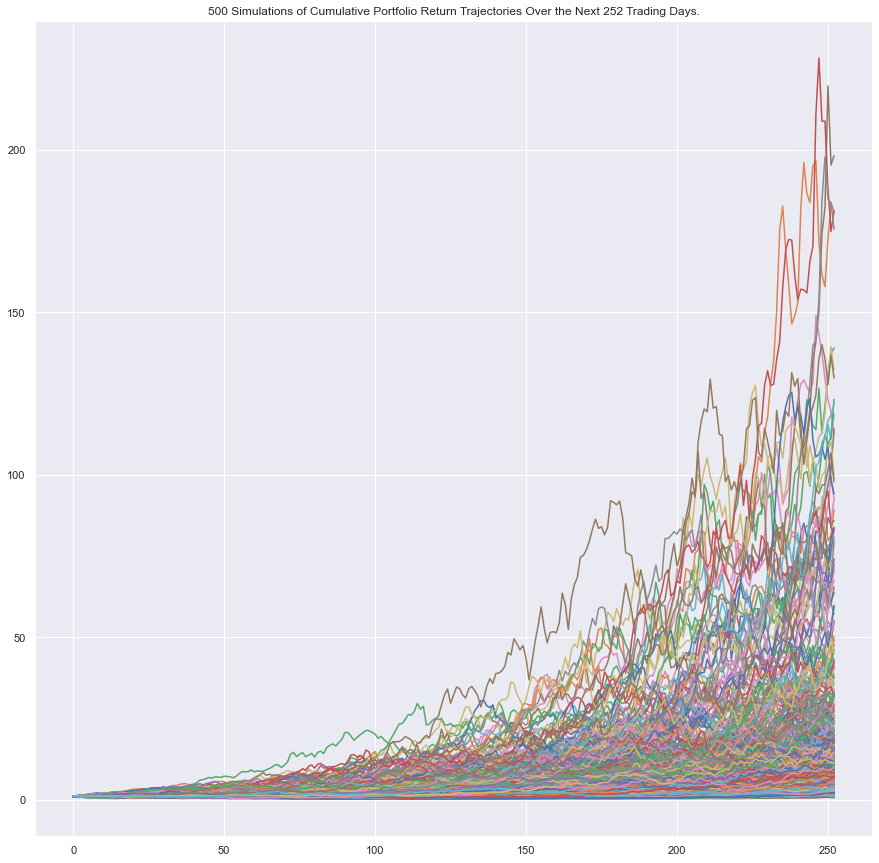

In [39]:
one_year_simulation.plot_simulation()

In [40]:
# Generate summary statistics from the Monte Carlo simulation results
# Save the results as a variable
summary_stats = one_year_simulation.summarize_cumulative_return()
summary_stats

count           500.000000
mean             20.028692
std              27.418554
min               0.640585
25%               5.306327
50%              10.586667
75%              20.975319
max             198.166830
95% CI Lower      1.366878
95% CI Upper     99.171552
Name: 252, dtype: float64

In [42]:
# Set the values of the initial investment
initial = 14000

In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_one_cumulative_return = round(summary_stats[8]*initial,2)
ci_upper_one_cumulative_return = round(summary_stats[9]*initial,2)
mean_return = round(summary_stats[1]*initial,2) 

In [44]:
# Print the result of your calculations
print(f"There is a 95% chance that the stock portfolio"
      f" over the next thirty years will end within the range of"
      f" ${ci_lower_one_cumulative_return} and ${ci_upper_one_cumulative_return}.")

There is a 95% chance that the stock portfolio over the next thirty years will end within the range of $19136.3 and $1388401.73.


In [45]:
# Print the mean return
print(f"The mean one year simulated return would put the portfolio value at ${mean_return}.")

The mean one year simulated return would put the portfolio value at $280401.68.
